<a href="https://colab.research.google.com/github/GUNWOOOH/ADP_Practice/blob/main/ADP%EC%8B%A4%EC%8A%B5_4%EC%A3%BC%EC%B0%A8_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA 

data: titanic data



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
titanic = sns.load_dataset('titanic') 
print(titanic.head()) # 첫 5개 행만 출력
print(type(titanic))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>


In [28]:
titanic.info() # data type 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
titanic.isnull().sum() # -> NA imputation


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [30]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]



,column,count,ratio
3,age,177,0.198653
7,embarked,2,0.002245
11,deck,688,0.772166
12,embark_town,2,0.002245


In [37]:
#결측치 채우기 => deck 제거, age는 평균, 그 외 na 행 제거
titanic_1 = titanic.drop(['deck'], axis=1)
titanic_1['age'] = titanic_1['age'].fillna(titanic_1['age'].mean())
titanic_1 = titanic_1.dropna(axis=0)

In [38]:
titanic_1.isnull().sum() 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

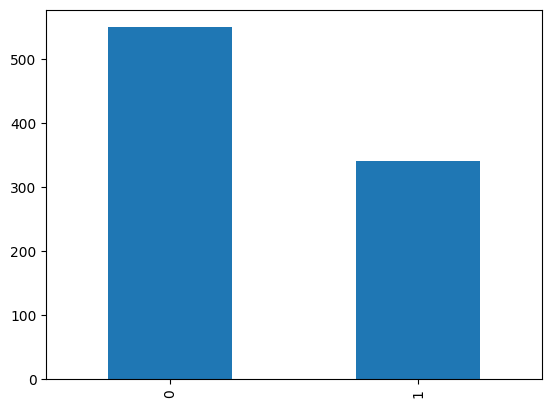

In [39]:
titanic_1['survived'].value_counts().plot(kind='bar') #Y check
plt.show()

In [41]:
category_feature = [ col for col in titanic_1.columns if titanic_1[col].dtypes == "object"]


['sex', 'embarked', 'who', 'embark_town', 'alive']

In [42]:
#인덱스와 타겟 제거
category_feature = list(set(category_feature) - set(['passengerId','survived']))
category_feature

['alive', 'embark_town', 'sex', 'who', 'embarked']

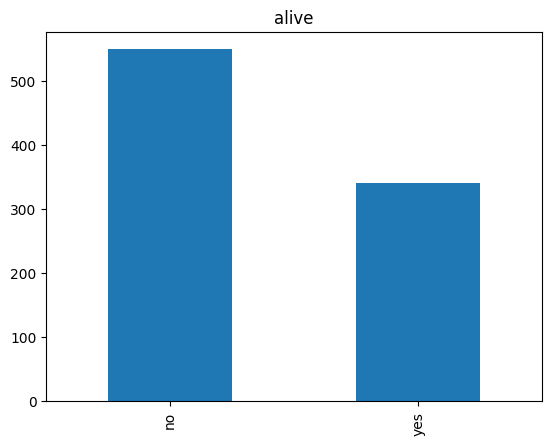

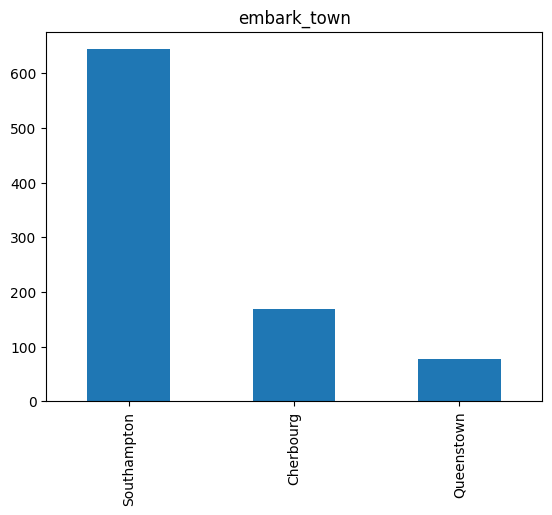

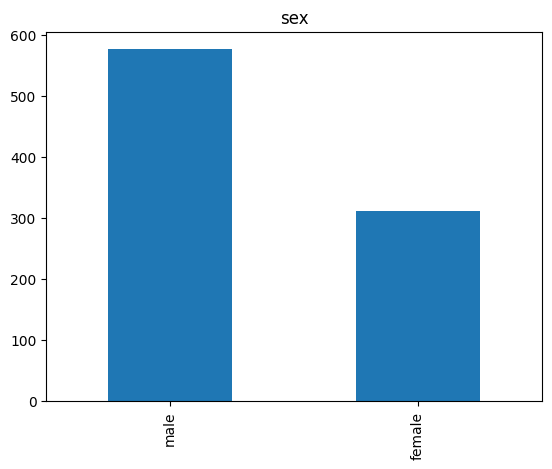

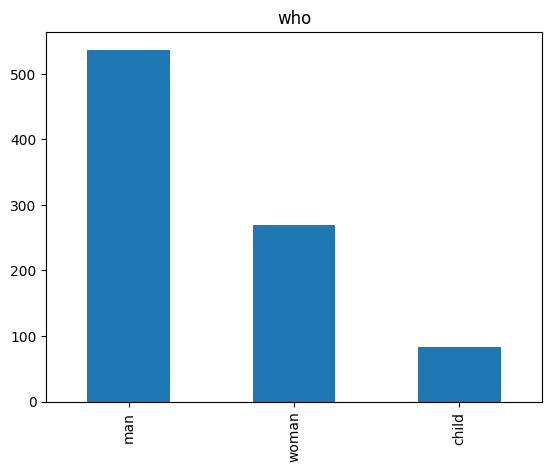

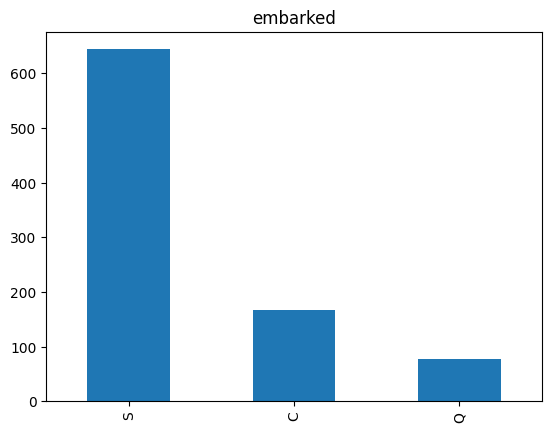

In [46]:
for col in category_feature:
    titanic_1[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

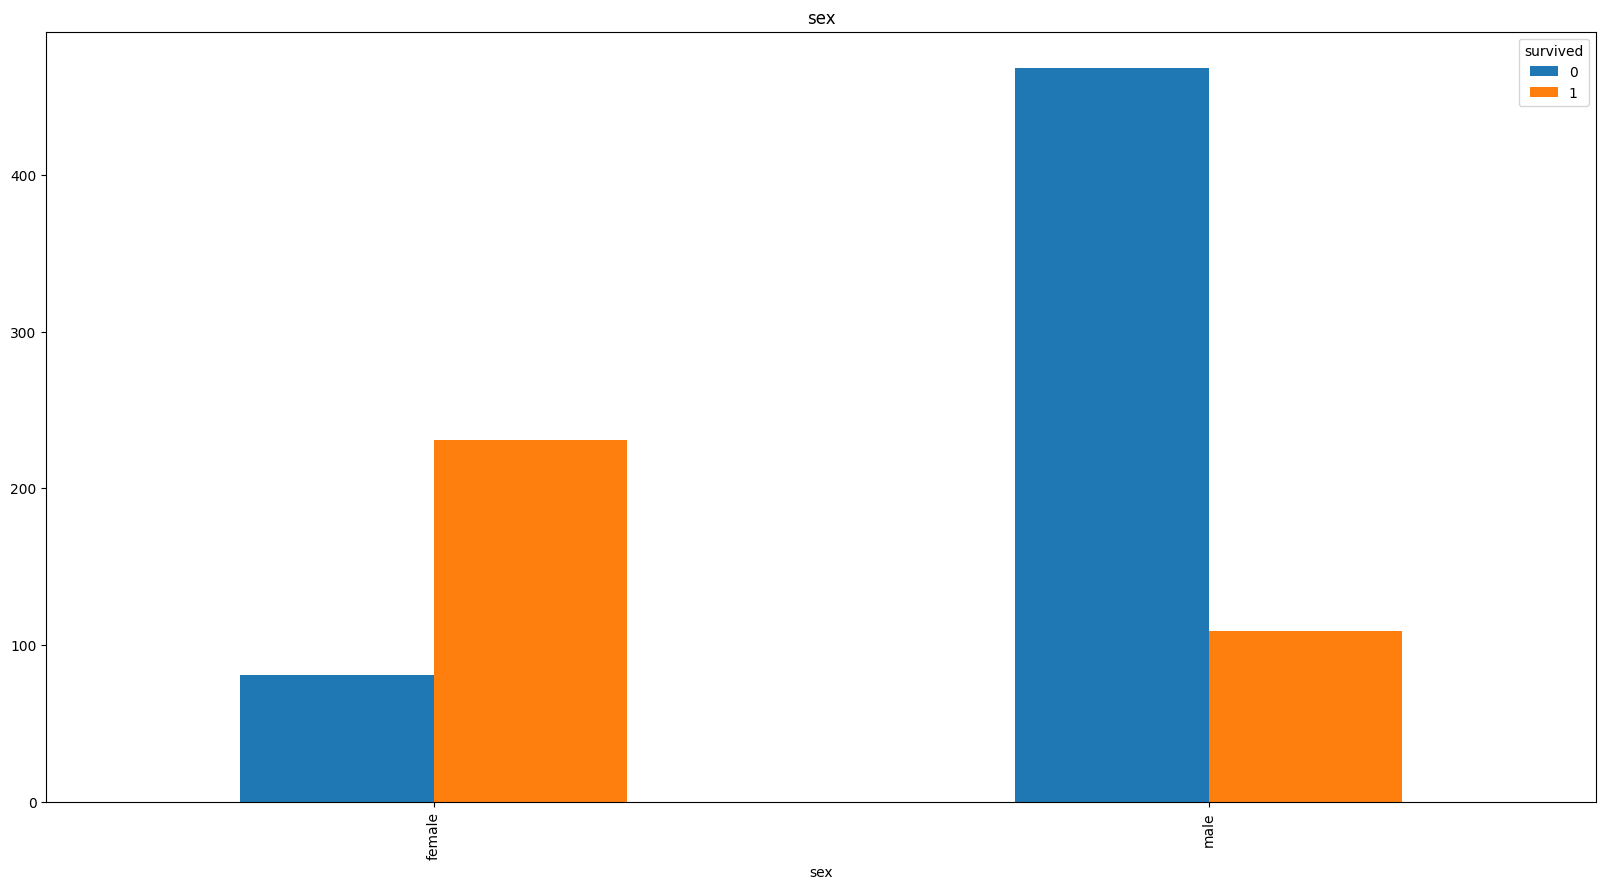

In [47]:
#두 변수 탐색
sex_df = titanic_1.groupby(['sex','survived'])['survived'].count().unstack('survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('sex')
plt.show()

In [51]:
#수치형 탐색
#numerical_feature = list(set(titanic_1.columns) - set(category_feature) - set(['passengerId','survived']))
numerical_feature = [ col for col in titanic_1.columns if titanic_1[col].dtypes == "float64"]
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['age', 'fare'], dtype='<U4')

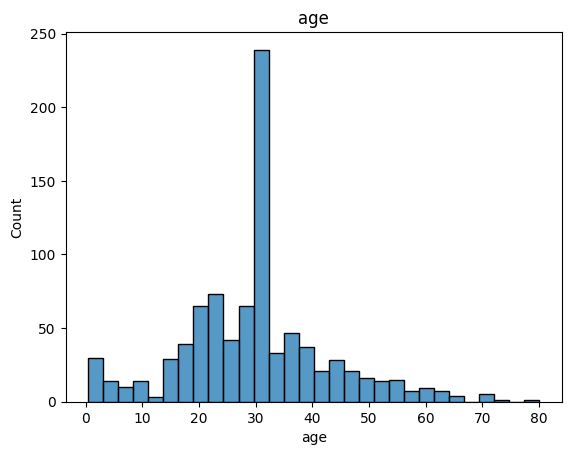

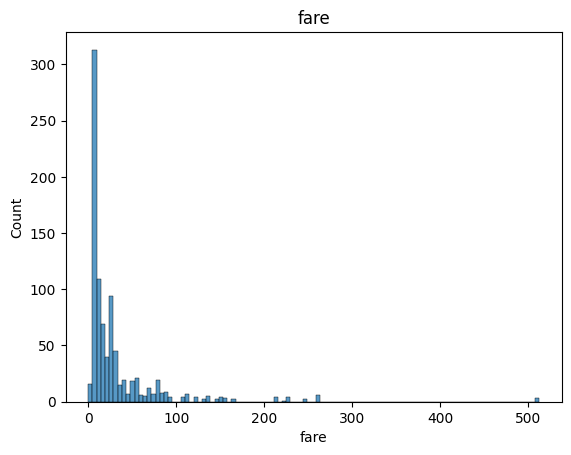

In [52]:
for col in numerical_feature:
    sns.histplot(titanic_1.loc[titanic_1[col].notnull(), col])
    plt.title(col)
    plt.show()

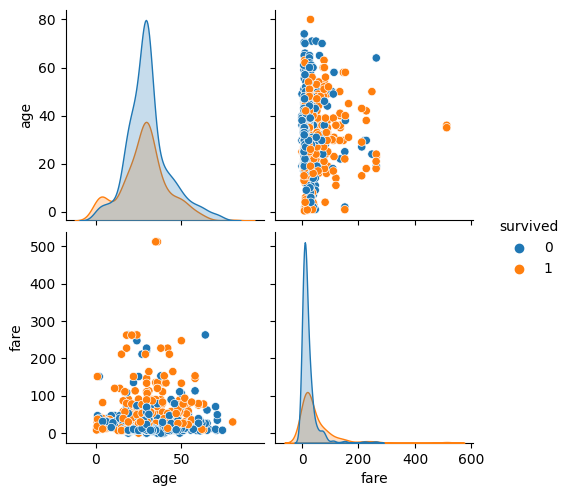

In [53]:
sns.pairplot(titanic_1[list(numerical_feature) + ['survived']], hue='survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

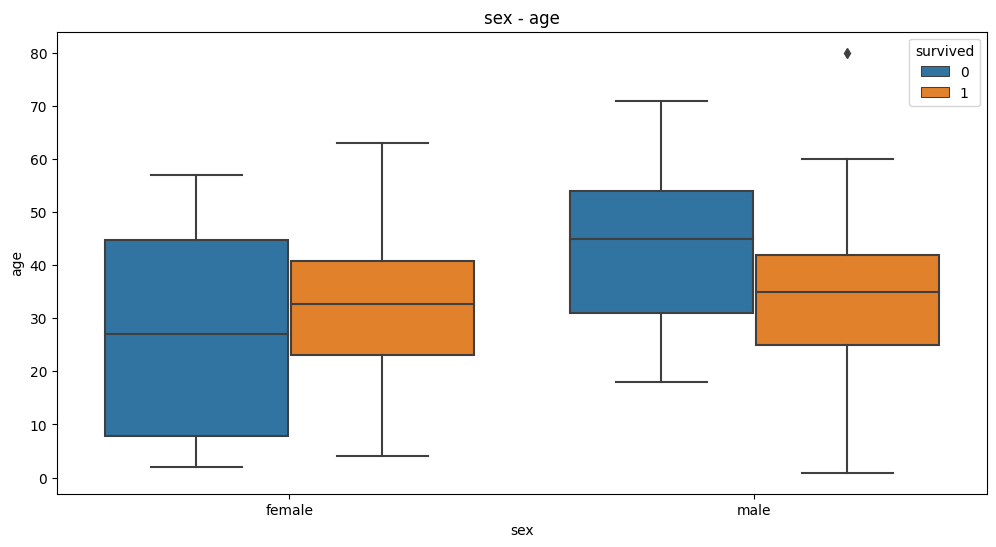

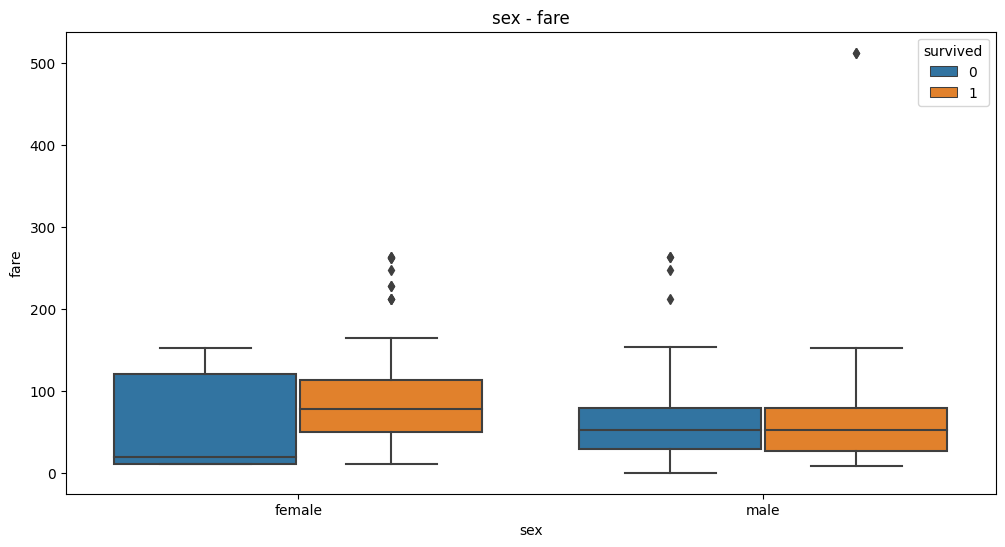

In [56]:
unique_list = titanic['sex'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='sex', y=col, hue='survived', data=titanic.dropna())
    plt.title("sex - {}".format(col))
    plt.show()